In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mp_df = pd.read_csv("data/mp_full.csv")
vp_df = pd.read_csv("data/vp_full.csv")
mp_report_counts = mp_df['misperid'].value_counts()
vp_report_counts = vp_df['misper_misperid'].value_counts()


In [2]:
people_results = pd.read_csv("/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/results/1/people.csv")
people_results = people_results.drop(people_results.columns[0], axis=1)
people_results['number_of_mp_reports_in_a_case'] = people_results['misperid'].map(mp_report_counts)
people_results['number_of_vp_reports_in_a_case'] = people_results['misperid'].map(vp_report_counts)
people_results['number_of_all_reports_in_a_case'] = people_results['number_of_mp_reports_in_a_case'] + people_results['number_of_vp_reports_in_a_case'] 



In [3]:
people_results['all_truth'] = people_results['positive'] + people_results['partial'] + people_results['missing']
people_results['result_percentage_exact'] = people_results['positive'] / people_results['all_truth']
people_results['result_percentage_partial'] = people_results['partial'] / people_results['all_truth']

people_results['result_percentage_potential_positive'] = people_results['potential_positive'] / people_results['all_truth']

In [4]:
people_results['insert_but_in_text']

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Name: insert_but_in_text, Length: 300, dtype: int64

In [5]:
len(people_results[people_results['insert_hallucination']>0])

123

## tries

Descriptive Statistics:

count    300.000
mean       1.477
std        2.050
min        1.000
25%        1.000
50%        1.000
75%        1.000
max       11.000
Name: try_count, dtype: float64


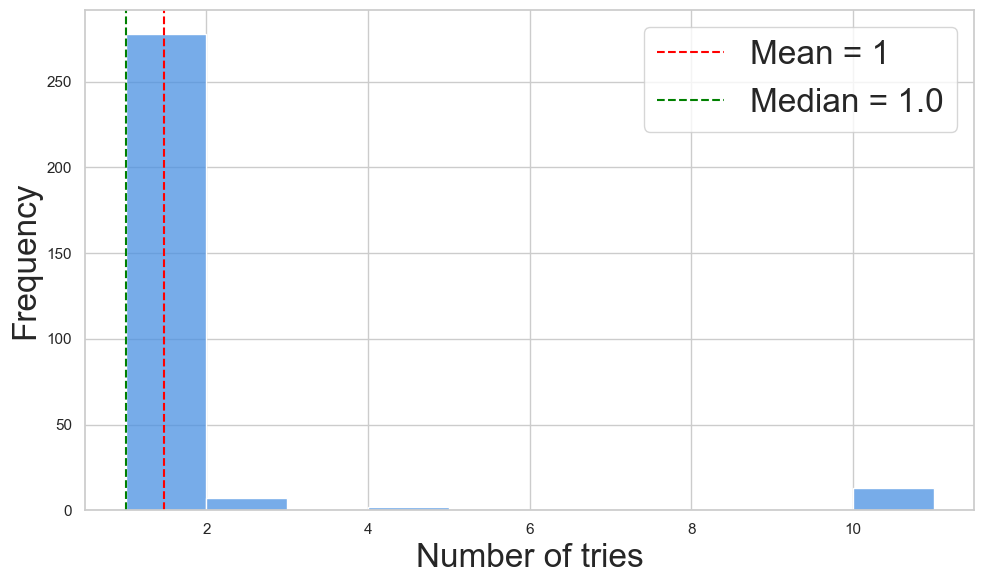

In [6]:
col = 'try_count'
df = people_results 
desc_stats = df[col].describe()
print("Descriptive Statistics:\n")
print(desc_stats.round(3))

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

df[col] = df[col]
sns.histplot(df[col], bins=10, kde=False, color="#4A90E2", edgecolor="white")

mean_val = df[col].mean()
median_val = df[col].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.20}')

plt.xlabel("Number of tries", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("plots/asso_tries.svg", bbox_inches='tight')
plt.tight_layout()

In [7]:
people_results = people_results[people_results['try_count']!=11]

In [8]:
people_results[people_results['insert_but_in_text']!=0]

,potential_positive,positive,partial,missing,insert_all,insert_but_in_text,insert_hallucination,try_count,truth_set,summ_set,misperid,number_of_mp_reports_in_a_case,number_of_vp_reports_in_a_case,number_of_all_reports_in_a_case,all_truth,result_percentage_exact,result_percentage_partial,result_percentage_potential_positive
128,19,7,12,1,6,1,5,1,"{'Janet Leach', 'Amanda Hayes', 'friend Nigel ...","{'Colleague other', 'Concerned friend other', ...",4260,28,2.0,30.0,20,0.350000,0.600000,0.950000
219,10,1,9,3,6,1,5,1,"{'friend', 'Carol', 'Rosemary Hayes', 'Richard...","{'neighbor concerned neighbor', 'friend close ...",7118,9,7.0,16.0,13,0.076923,0.692308,0.769231


#### Precision(s)

In [9]:
people_results['precision'] = people_results['positive'] / (people_results['potential_positive'] + people_results['insert_all'])
people_results['part_precision'] = people_results['potential_positive'] / (people_results['potential_positive'] + people_results['insert_all'])
people_results['max_precision'] = (people_results['potential_positive'] +  people_results['insert_but_in_text']  )/ (people_results['potential_positive'] + people_results['insert_all']) # since insert_all = insert_hall + insert_in_text

/var/folders/dh/35wwxkcn54xfd_c1kgvbkd380000gn/T/ipykernel_75760/538803621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_results['precision'] = people_results['positive'] / (people_results['potential_positive'] + people_results['insert_all'])
/var/folders/dh/35wwxkcn54xfd_c1kgvbkd380000gn/T/ipykernel_75760/538803621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_results['part_precision'] = people_results['potential_positive'] / (people_results['potential_positive'] + people_results[

#### Recall(s)

In [10]:
people_results['recall'] = people_results['positive'] / (people_results['missing'] + people_results['potential_positive'])
people_results['part_recall'] = people_results['potential_positive'] / (people_results['potential_positive'] + people_results['missing'])
people_results['max_recall'] = (people_results['potential_positive']  + people_results['insert_but_in_text'])/ (people_results['potential_positive']+people_results['insert_but_in_text'] + people_results['missing'])


/var/folders/dh/35wwxkcn54xfd_c1kgvbkd380000gn/T/ipykernel_75760/1404510488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_results['recall'] = people_results['positive'] / (people_results['missing'] + people_results['potential_positive'])
/var/folders/dh/35wwxkcn54xfd_c1kgvbkd380000gn/T/ipykernel_75760/1404510488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_results['part_recall'] = people_results['potential_positive'] / (people_results['potential_positive'] + people_results['missin

In [ ]:
people_results[people_results['insert_hallucination']==7]['misperid']

77    2528
87    2915
Name: misperid, dtype: int64

In [ ]:
from utils.ploting import create_professional_boxplot
metrics_cols = ['precision', 'part_precision', 'max_precision', 'recall', 'part_recall']
plot_title = "Distribution of Precision and Recall Metrics \n Assosiation Network"
plot_subtitle = "Association Network Entities"
create_professional_boxplot(people_results, metrics_cols, plot_title, plot_subtitle, "people")

# number of reports

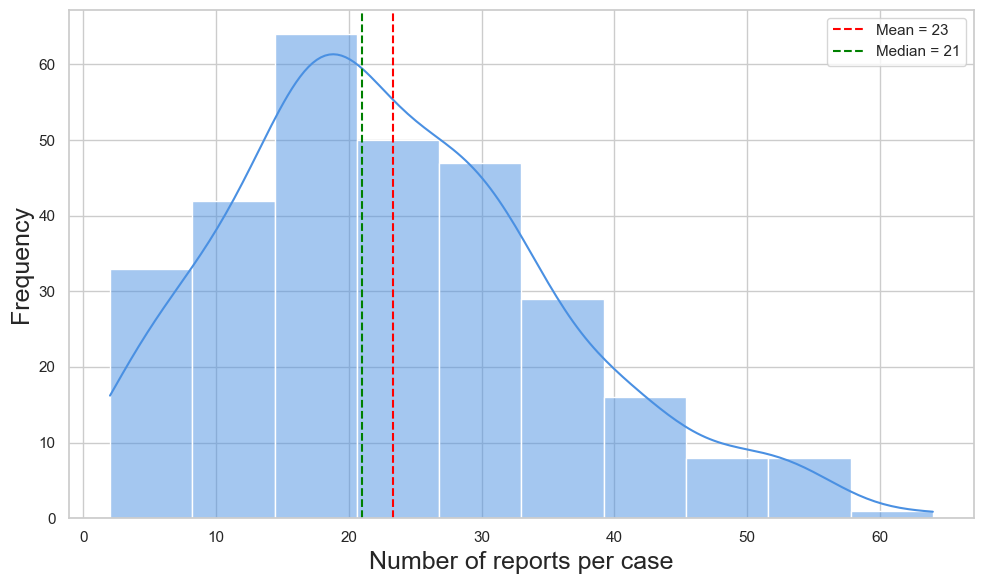

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col = 'number_of_all_reports_in_a_case'

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

df[col] = df[col]
sns.histplot(df[col], bins=10, kde=True, color="#4A90E2", edgecolor="white")

# --- Add Mean & Median Lines ---
mean_val = df[col].mean()
median_val = df[col].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.0f}')

# --- Labels & Styling ---
plt.xlabel("Number of reports per case", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig("plots/num_reports_fake.svg")

plt.show()


# other

In [ ]:


def plot_distrib(df, col, title, multiply=True):
    desc_stats = df[col].describe()
    print("Descriptive Statistics:\n")
    print(desc_stats.round(3))

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))

    df[col] = df[col]*100 if multiply else df[col]
    sns.histplot(df[col], bins=10, kde=True, color="#4A90E2", edgecolor="white")

    # --- Add Mean & Median Lines ---
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}%')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}%')

    # --- Labels & Styling ---
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel("% of entities matched", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.tight_layout()
    
    return plt


In [ ]:
# plot_distrib(people_results, 'number_of_all_reports_in_a_case', "number of reports")

In [ ]:
# plot_distrib(people_results, 'result_percentage_exact', "% of people entities exactly matched")

In [ ]:
# plot_distrib(people_results, 'result_percentage_partial', "% of people entities partially matched")

Descriptive Statistics:

count    287.000
mean       0.694
std        0.244
min        0.000
25%        0.500
50%        0.765
75%        0.889
max        1.000
Name: result_percentage_potential_positive, dtype: float64


/var/folders/dh/35wwxkcn54xfd_c1kgvbkd380000gn/T/ipykernel_66257/2835202964.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col]*100 if multiply else df[col]


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

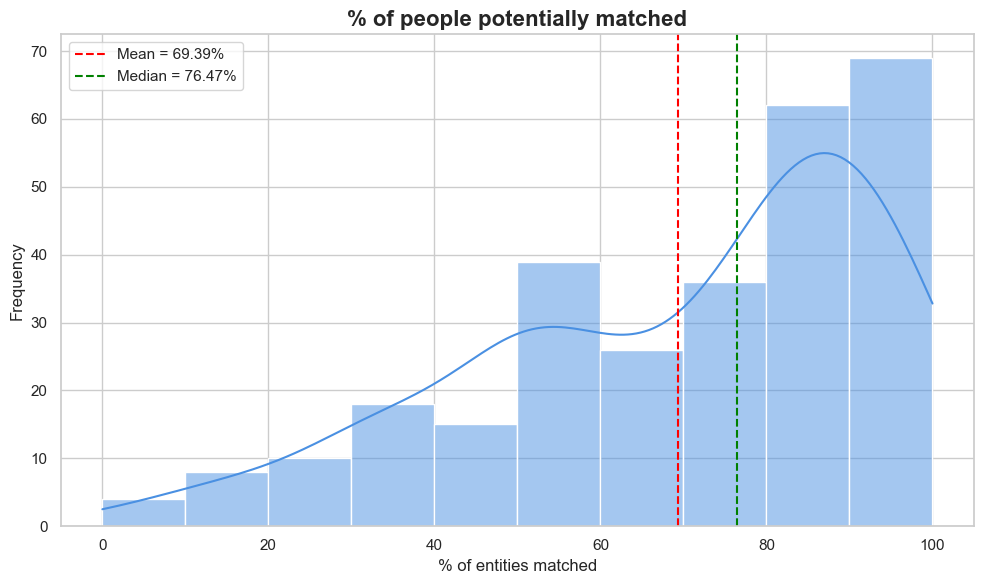

In [ ]:
plot_distrib(people_results, 'result_percentage_potential_positive', "% of people potentially matched")

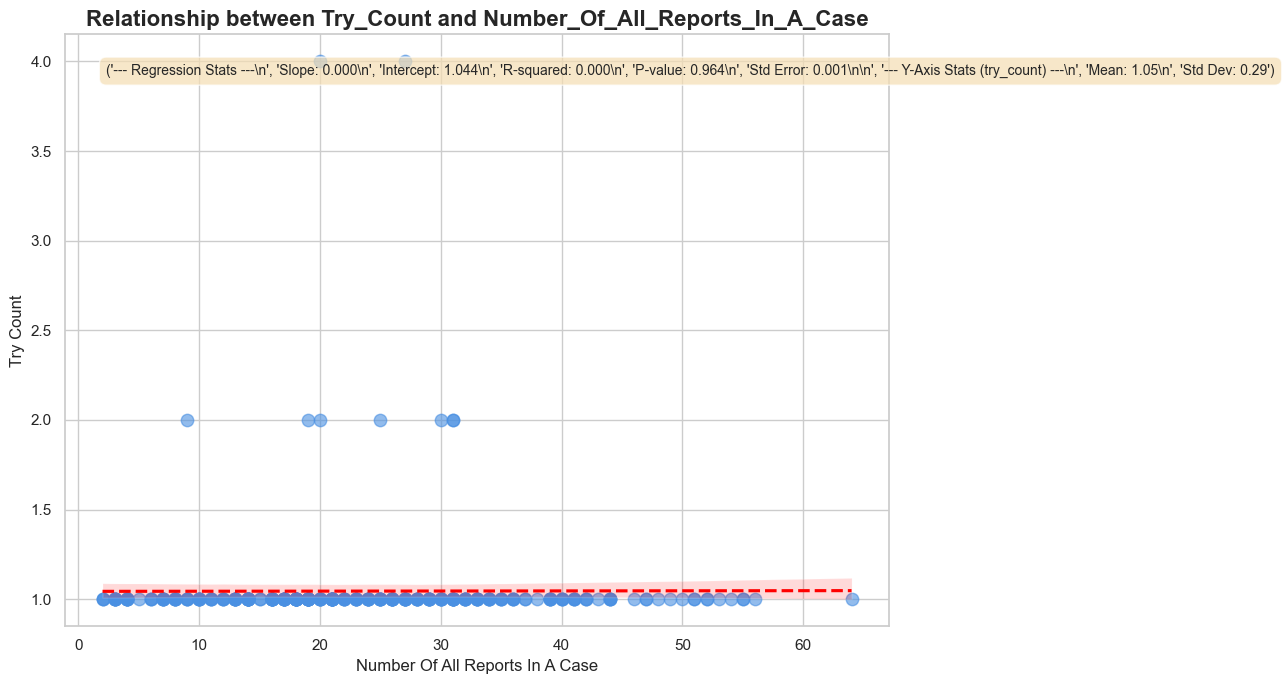

      Regression Statistics
Slope: 0.0001
Intercept: 1.0441
R-value (Correlation Coefficient): 0.0027
R-squared: 0.0000
P-value: 0.9640
Standard Error of the Estimate: 0.0014


Descriptive Statistics for X-Axis:

count    285.000
mean      23.326
std       12.328
min        2.000
25%       14.000
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    287.000
mean       1.045
std        0.292
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        4.000
Name: try_count, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = people_results.copy()

y_axis_col= 'try_count'
x_axis_col = 'number_of_all_reports_in_a_case'

clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))


scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, 
    line_kws={'color': 'red', 'linestyle': '--'} 
)

plt.title(f'Relationship between {y_axis_col.title()} and {x_axis_col.title()}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)


stats_text = (
    f"--- Regression Stats ---\n",
    f"Slope: {slope:.3f}\n",
    f"Intercept: {intercept:.3f}\n",
   f"R-squared: {r_squared:.3f}\n",
    f"P-value: {p_value:.3f}\n",
    f"Std Error: {std_err:.3f}\n\n",
    f"--- Y-Axis Stats ({y_axis_col}) ---\n",
    f"Mean: {df[y_axis_col].mean():.2f}\n",
    f"Std Dev: {df[y_axis_col].std():.2f}"
)

plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

plt.savefig("plots/asso_hall.svg", bbox_inches='tight')


plt.tight_layout()
plt.show()


print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))

In [ ]:
df['number_of_all_reports_in_a_case']

0       4.0
1      29.0
2      13.0
3      19.0
4      19.0
       ... 
295    19.0
296    19.0
297    17.0
298    39.0
299    33.0
Name: number_of_all_reports_in_a_case, Length: 287, dtype: float64

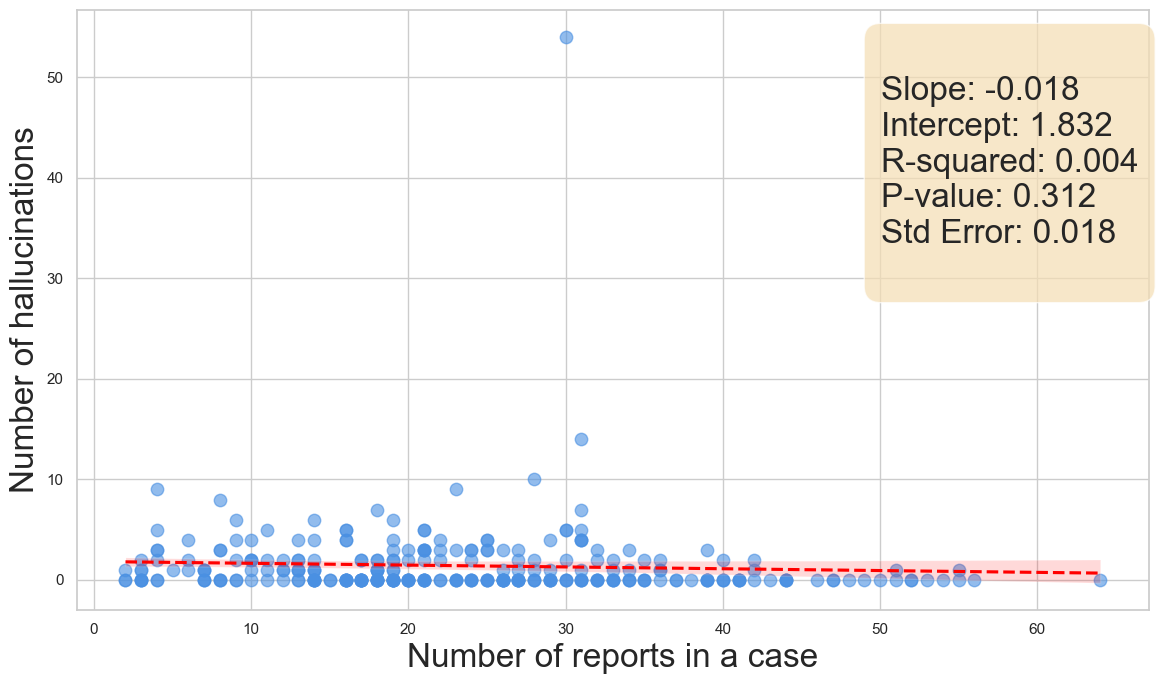

      Regression Statistics
Slope: -0.0181
Intercept: 1.8316
R-value (Correlation Coefficient): -0.0601
R-squared: 0.0036
P-value: 0.3118
Standard Error of the Estimate: 0.0178


Descriptive Statistics for X-Axis:

count    285.000
mean      23.326
std       12.328
min        2.000
25%       14.000
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    287.000
mean       1.401
std        3.690
min        0.000
25%        0.000
50%        0.000
75%        2.000
max       54.000
Name: insert_hallucination, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = people_results.copy()
y_axis_col= 'insert_hallucination'
x_axis_col = 'number_of_all_reports_in_a_case'


clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

plt.xlabel('Number of reports in a case', fontsize=24)
plt.ylabel('Number of hallucinations', fontsize=24)

stats_text = f"""
Slope: {slope:.3f}
Intercept: {intercept:.3f}
R-squared: {r_squared:.3f}
P-value: {p_value:.3f}
Std Error: {std_err:.3f}
"""


plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=24,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

plt.tight_layout()
plt.savefig("plots/asso_hall.svg", bbox_inches='tight')

plt.show()
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


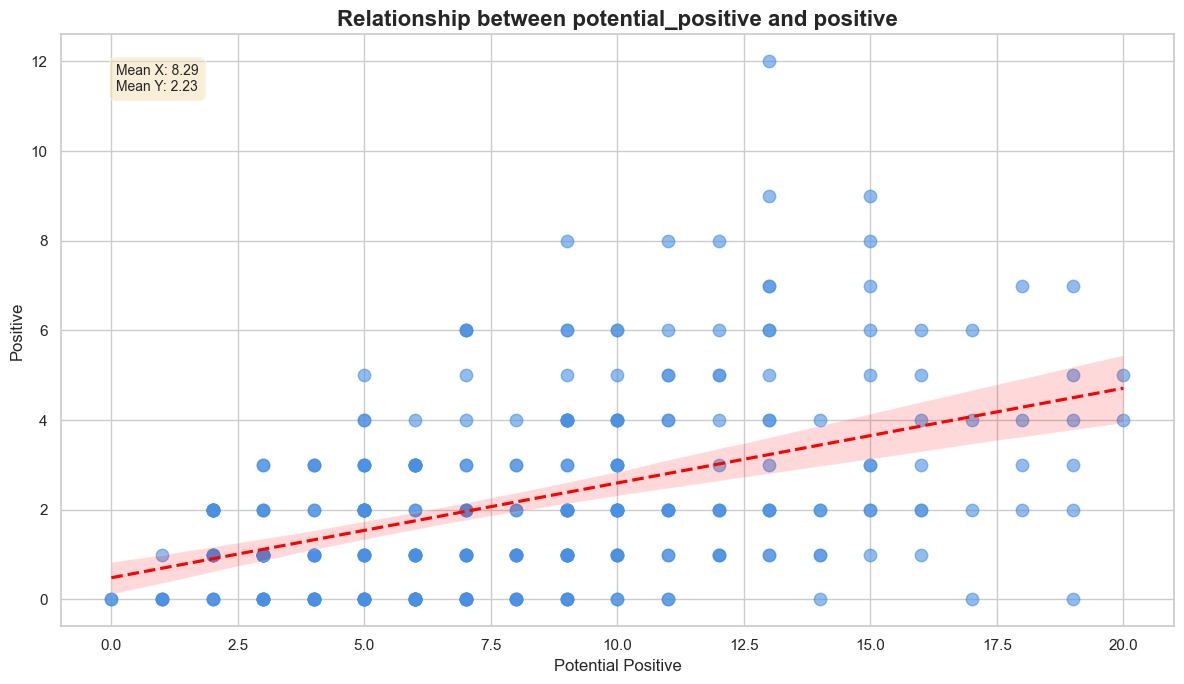

Descriptive Statistics for X-Axis:

count    287.000
mean       8.286
std        4.525
min        0.000
25%        5.000
50%        8.000
75%       11.000
max       20.000
Name: potential_positive, dtype: float64


Descriptive Statistics for Y-Axis:

count    287.000
mean       2.233
std        2.080
min        0.000
25%        1.000
50%        2.000
75%        3.000
max       12.000
Name: positive, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = people_results.copy()

y_axis_col= 'positive'
x_axis_col = 'potential_positive'

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'},
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)

x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


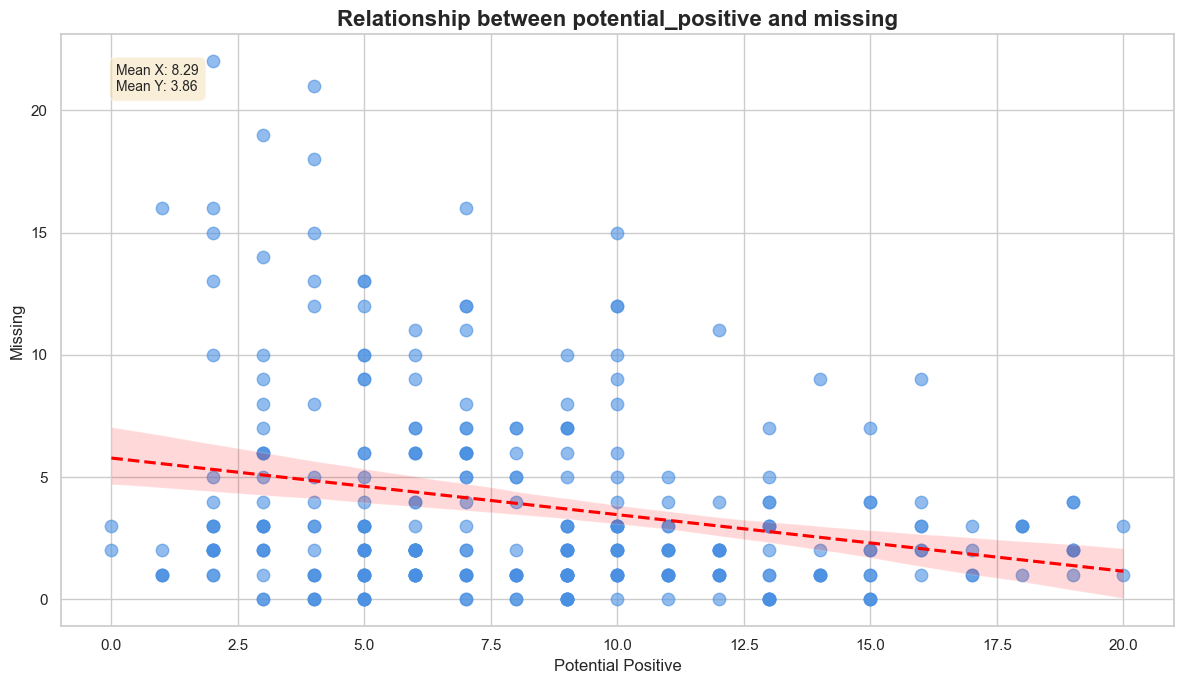

Descriptive Statistics for X-Axis:

count    287.000
mean       8.286
std        4.525
min        0.000
25%        5.000
50%        8.000
75%       11.000
max       20.000
Name: potential_positive, dtype: float64


Descriptive Statistics for Y-Axis:

count    287.000
mean       3.861
std        4.093
min        0.000
25%        1.000
50%        2.000
75%        5.000
max       22.000
Name: missing, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = people_results.copy()

y_axis_col= 'missing'
x_axis_col = 'potential_positive'

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, 
    line_kws={'color': 'red', 'linestyle': '--'}
)


plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)

x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()
print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = people_results.copy()

y_axis_col= 'try_count'
x_axis_col = 'count_of_all_reports'

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, 
    line_kws={'color': 'red', 'linestyle': '--'}
)


plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)

x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


KeyError: 'count_of_all_reports'

<Figure size 1200x700 with 0 Axes>